<a href="https://colab.research.google.com/github/mrandrivan/ML-DL-AI-practice/blob/main/ML_prediction_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Asset Allocation & Statistical Data Analysis**

**Types of Assets**

1. Equities (Stocks)

A stock simply represents an ownership of a certain percentage of a company
It gives the owner the right to some shares in a given company
Stocks are generally liquid & are traded on stock exchanges

2. Fixed Income Securities (Bonds)

A Bond is a fixed income that is generally issued by governments or corporations
Bonds pay the investor a ficed stated interest rate
Bond coupons represent a semi-annual interest payment to the bond holder

3. Exchange Traded Funds (ETFs)

ETFs are a type of security that includes a group of securities & possible track an index
ETFs are more similar to mutual funds, however they are marketable securities & can be traded on exchanges just like stocks
Includes collection of stocks, bonds & commodities
Generally low management fees & offer a tool for risk diversification

In [14]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

**1. Import the data in**

In [11]:
# Reading the stock data file
stocks_df = pd.read_csv('stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [12]:

# Convert 'Date' column to datetime
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# Set 'Date' column as the index
stocks_df.set_index('Date', inplace=True)

# Fill any missing values (using forward fill method here)
stocks_df.fillna(method='ffill', inplace=True)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stocks_df)

# Convert the scaled data back to a DataFrame
scaled_stocks_df = pd.DataFrame(scaled_data, columns=stocks_df.columns, index=stocks_df.index)

# Display the first few rows of the scaled data
print(scaled_stocks_df.head())

                AAPL        BA         T       MGM      AMZN       IBM  \
Date                                                                     
2012-01-12  0.011026  0.022149  0.200599  0.161541  0.000000  0.708750   
2012-01-13  0.010462  0.019712  0.197605  0.168663  0.000817  0.697265   
2012-01-17  0.012209  0.021426  0.208383  0.165426  0.001879  0.704206   
2012-01-18  0.013785  0.020944  0.213174  0.180965  0.004431  0.713046   
2012-01-19  0.013299  0.022283  0.218563  0.183231  0.006074  0.708502   

                TSLA      GOOG     sp500  
Date                                      
2012-01-12  0.003370  0.027258  0.008282  
2012-01-13  0.000000  0.025463  0.005242  
2012-01-17  0.002352  0.026849  0.007414  
2012-01-18  0.002481  0.028521  0.014231  
2012-01-19  0.002450  0.031093  0.017295  


**2. Defining input and output variables & dividing the dataset into train and test parts**

In [13]:
#A. Small function that defines features and labels
def create_features_and_labels(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Define the number of time steps (e.g., using the last 10 days to predict the next day)
time_steps = 10

# Create features and labels
X, y = create_features_and_labels(scaled_stocks_df.values, time_steps)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


**3. Now we define the Model parameters**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split

# Features and labels are already prepared as X and y
# scaled_stocks_df has been prepared

# Define the number of time steps (e.g., using the last 10 days to predict the next day)
time_steps = 10

# Create features and labels
X, y = create_features_and_labels(scaled_stocks_df.values, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100))
model.add(Dense(units=y_train.shape[1]))  # Output layer with the number of stocks

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


X_train shape: (1719, 10, 9)
X_test shape: (430, 10, 9)
y_train shape: (1719, 9)
y_test shape: (430, 9)
Epoch 1/50
43/43 [==============================] - 6s 43ms/step - loss: 0.0170 - val_loss: 0.0329
Epoch 2/50
43/43 [==============================] - 1s 21ms/step - loss: 0.0013 - val_loss: 0.0193
Epoch 3/50
43/43 [==============================] - 1s 21ms/step - loss: 8.4875e-04 - val_loss: 0.0151
Epoch 4/50
43/43 [==============================] - 1s 22ms/step - loss: 7.0168e-04 - val_loss: 0.0121
Epoch 5/50
43/43 [==============================] - 1s 23ms/step - loss: 6.2466e-04 - val_loss: 0.0116
Epoch 6/50
43/43 [==============================] - 1s 35ms/step - loss: 6.1557e-04 - val_loss: 0.0097
Epoch 7/50
43/43 [==============================] - 2s 36ms/step - loss: 5.7701e-04 - val_loss: 0.0085
Epoch 8/50
43/43 [==============================] - 1s 26ms/step - loss: 5.6286e-04 - val_loss: 0.0073
Epoch 9/50
43/43 [==============================] - 1s 22ms/step - loss: 5.6961e

Epoch 1/50
43/43 [==============================] - 1s 23ms/step - loss: 2.5991e-04 - val_loss: 0.0013
Epoch 2/50
43/43 [==============================] - 1s 22ms/step - loss: 2.6667e-04 - val_loss: 0.0018
Epoch 3/50
43/43 [==============================] - 1s 22ms/step - loss: 2.7477e-04 - val_loss: 0.0015
Epoch 4/50
43/43 [==============================] - 1s 34ms/step - loss: 2.5187e-04 - val_loss: 0.0014
Epoch 5/50
43/43 [==============================] - 1s 34ms/step - loss: 2.5427e-04 - val_loss: 0.0012
Epoch 6/50
43/43 [==============================] - 1s 34ms/step - loss: 2.4094e-04 - val_loss: 0.0011
Epoch 7/50
43/43 [==============================] - 1s 22ms/step - loss: 2.5980e-04 - val_loss: 0.0012
Epoch 8/50
43/43 [==============================] - 1s 22ms/step - loss: 2.6721e-04 - val_loss: 0.0013
Epoch 9/50
43/43 [==============================] - 1s 23ms/step - loss: 2.3439e-04 - val_loss: 0.0014
Epoch 10/50
43/43 [==============================] - 1s 23ms/step - loss:

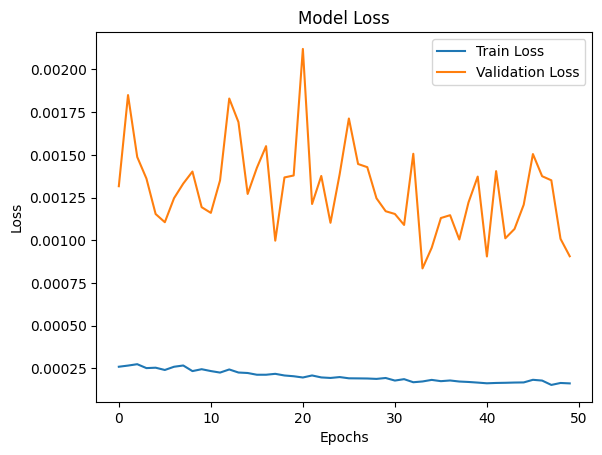

In [17]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**4.Evaluating the model, predicting the results and Plotting**

In [18]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions and the actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE for each stock
rmse = np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))

# Calculate MAE for each stock
mae = mean_absolute_error(y_test, predictions, multioutput='raw_values')

# Print the RMSE and MAE values
for stock, rmse_value, mae_value in zip(scaled_stocks_df.columns, rmse, mae):
    print(f'{stock} - RMSE: {rmse_value}, MAE: {mae_value}')



14/14 [==============================] - 2s 14ms/step
AAPL - RMSE: 41.96590423633445, MAE: 30.535632878261268
BA - RMSE: 19.89026601376997, MAE: 16.004077082652376
T - RMSE: 0.6829791578082189, MAE: 0.46718643160599116
MGM - RMSE: 3.5977544720923382, MAE: 3.2064046906318158
AMZN - RMSE: 101.82743091645821, MAE: 68.34747712329214
IBM - RMSE: 6.375240205230283, MAE: 5.752713185007496
TSLA - RMSE: 67.33525088920105, MAE: 55.4519284293559
GOOG - RMSE: 39.71710310545717, MAE: 31.405690885210785
sp500 - RMSE: 123.74590827136417, MAE: 91.07839468059588


In [19]:
# Get the last 'time_steps' days of data
last_days_data = scaled_stocks_df.values[-time_steps:]

# Reshape the data to match the input shape of the model
last_days_data = np.reshape(last_days_data, (1, time_steps, len(scaled_stocks_df.columns)))

# Predict today's stock prices
today_predictions = model.predict(last_days_data)

# Inverse transform the predictions
today_predictions = scaler.inverse_transform(today_predictions)

# Convert to a DataFrame
today_predictions_df = pd.DataFrame(today_predictions, columns=scaled_stocks_df.columns)

print("Today's predicted stock prices:")
print(today_predictions_df)


1/1 [==============================] - 0s 43ms/step
Today's predicted stock prices:
         AAPL         BA          T        MGM         AMZN         IBM  \
0  317.286102  204.96991  29.187029  27.729134  2975.269775  120.173035   

          TSLA        GOOG        sp500  
0  1429.490112  1488.74707  3116.519043  


**5. Visualizing the results to check how good our Model is**

<ipython-input-20-3f17254c7e7f>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


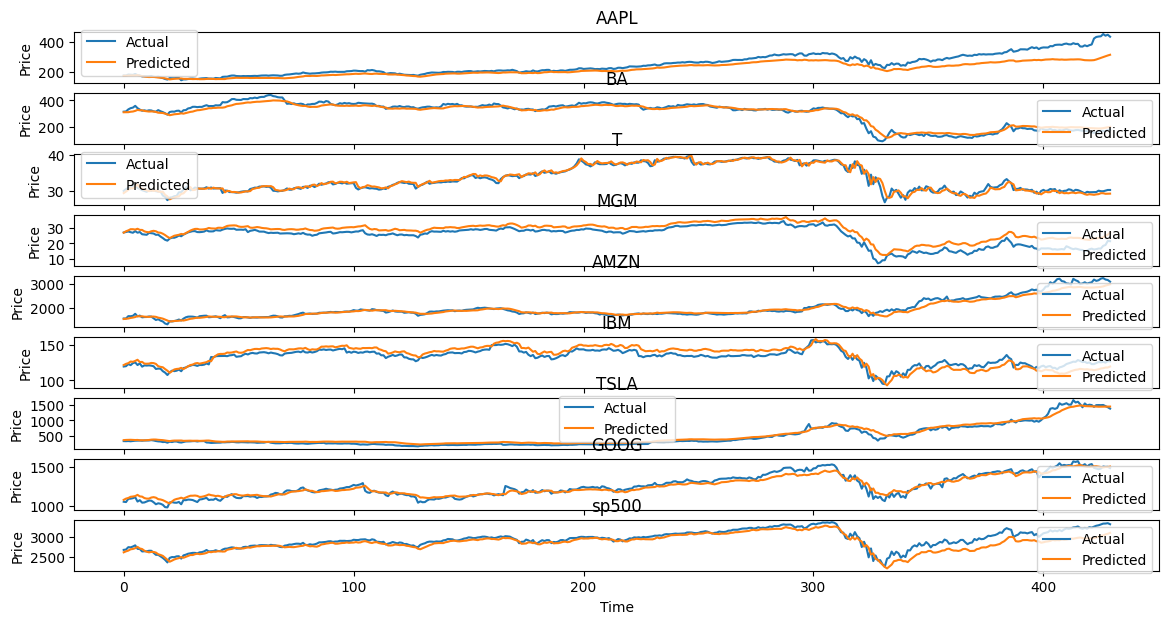

In [20]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values for each stock
plt.figure(figsize=(14, 7))

for i, stock in enumerate(scaled_stocks_df.columns):
    plt.subplot(len(scaled_stocks_df.columns), 1, i+1)
    plt.plot(y_test[:, i], label='Actual')
    plt.plot(predictions[:, i], label='Predicted')
    plt.title(stock)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()
